In [1]:
import rioxarray as rxr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# import data for 2 periods of time
#LC_da = rxr.open_rasterio('E:/diplom/landcover/KS/LC_KS_22_01.tif').squeeze()
LC_da = rxr.open_rasterio('E:/diplom/landcover/KS/LC_KS_19_10.tif').squeeze()

In [ ]:
LC_array = LC_da.data
vals = LC_array.ravel() # multidimensional array to onedimensional
vals = vals[(vals > 0) & (vals < 100)] # data filtering (values corresponding to the range of land use classification)

In [41]:
codes, counts = np.unique(vals, return_counts=True)

In [42]:
df = pd.DataFrame({
    "transition_code": codes,
    "pixel_count": counts
})

In [ ]:
# decoding transitions between two years that were recorded as a two-digit code (f.e. "32": "3" - class in 2019, "2" - in 2010)

#df['2022'] = df['transition_code'] // 10
#df['2001'] = df['transition_code'] % 10
df['2019'] = df['transition_code'] // 10
df['2010'] = df['transition_code'] % 10

In [ ]:
# transition_matrix = df.pivot_table(index='2001', columns='2022', values='pixel_count', fill_value=0)
transition_matrix = df.pivot_table(index='2010', columns='2019', values='pixel_count', fill_value=0)
transition_matrix

2019,1,2,3,4,5,6
2010,,,,,,
1,10119381.0,5574.0,20907.0,0.0,4830.0,5677.0
2,397.0,350284.0,572.0,105.0,125.0,242.0
3,334204.0,1603.0,5070602.0,0.0,6638.0,16167.0
4,0.0,266.0,0.0,24824.0,152.0,209.0
5,0.0,0.0,0.0,0.0,43546.0,0.0
6,22760.0,1171.0,6785.0,838.0,1036.0,651426.0


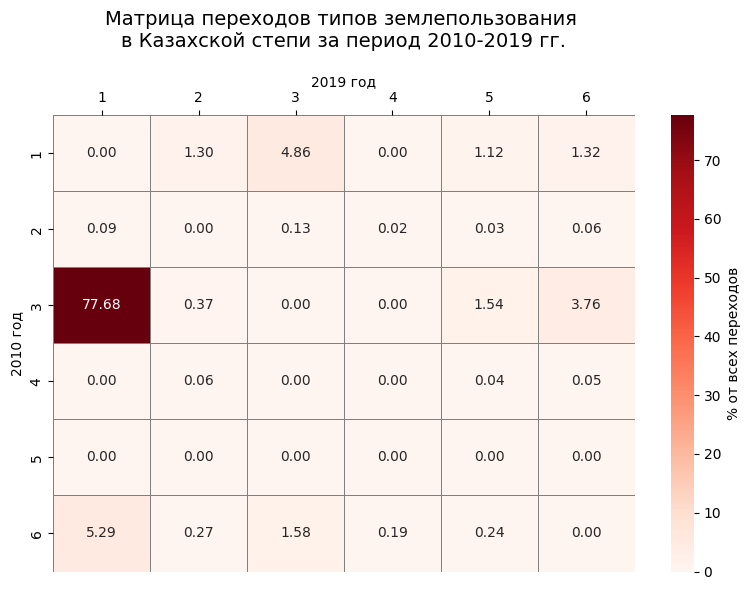

In [45]:
transition_matrix_changes = transition_matrix.copy()
for i in transition_matrix_changes.index:
    if i in transition_matrix_changes.columns:
        transition_matrix_changes.loc[i, i] = 0 

transitions_count = transition_matrix_changes.values.sum()
percent_matrix = (transition_matrix_changes / transitions_count * 100).round(2)

plt.figure(figsize=(8, 6))
ax = sns.heatmap(percent_matrix,
                 annot=True, fmt=".2f", cmap="Reds",
                 linewidths=0.5, linecolor='gray',
                 cbar_kws={"label": "% от всех переходов"})

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
#plt.title("Матрица переходов типов землепользования \nв Казахской степи за период 2001-2022 гг.", fontsize=14, pad=20)
#plt.xlabel("2022 год")
#plt.ylabel("2001 год")
plt.title("Матрица переходов типов землепользования \nв Казахской степи за период 2010-2019 гг.", fontsize=14, pad=20)
plt.xlabel("2019 год")
plt.ylabel("2010 год")

plt.tight_layout()
plt.show()